Analyze Times series:

 Plot time series (give visual feedback)

 Caculate and plot ACF (give visual feedback)

 Check, if the time series is stationarity (using Augmented Dickey-Fuller (ADF) test)

 If there is a trend - remove it from the Time Series

 Check seasonality (visually and using ACF)

 Run automatic ARIMA model determination. Find the best model, give summary and display the results (existing time range + future)

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sma
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [7]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'

This open-source dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

In [13]:
df = pd.read_csv(url, index_col=0, parse_dates=['Date'])

Exploring data

In [15]:
df.head(3)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [22]:
df.describe().T.apply(lambda s: s .apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
Temp,3650.00,11.18,4.07,0.00,8.30,11.00,14.00,26.30


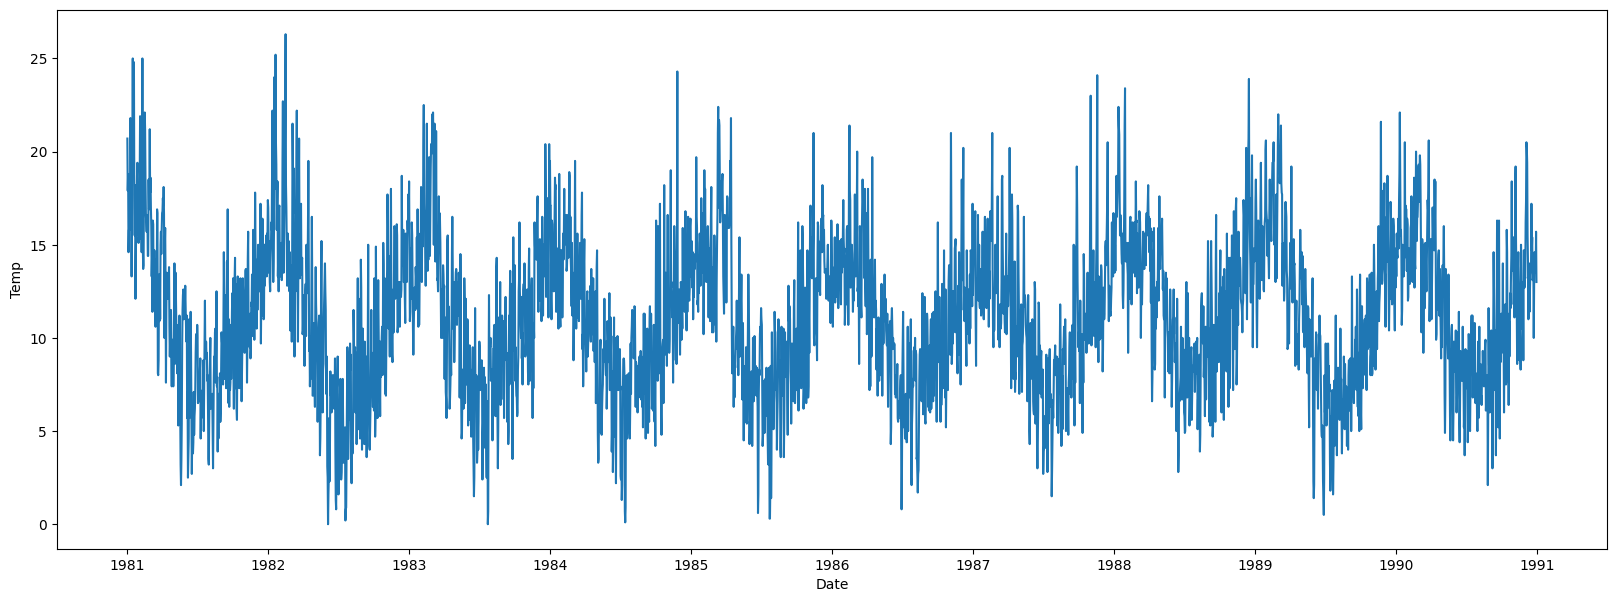

In [18]:
# Plotting data

plt.figure(figsize=(20,7))
sns.lineplot(x='Date', y='Temp', data=df)
plt.show()

The correlation of temperature is between 0 and 27 degrees. There is a trend of seasonality in data.

## AUTOCORRELATION FUNCTION (ACF)

In [20]:
df_acf = df.to_numpy().T[0]

<Figure size 2000x700 with 0 Axes>

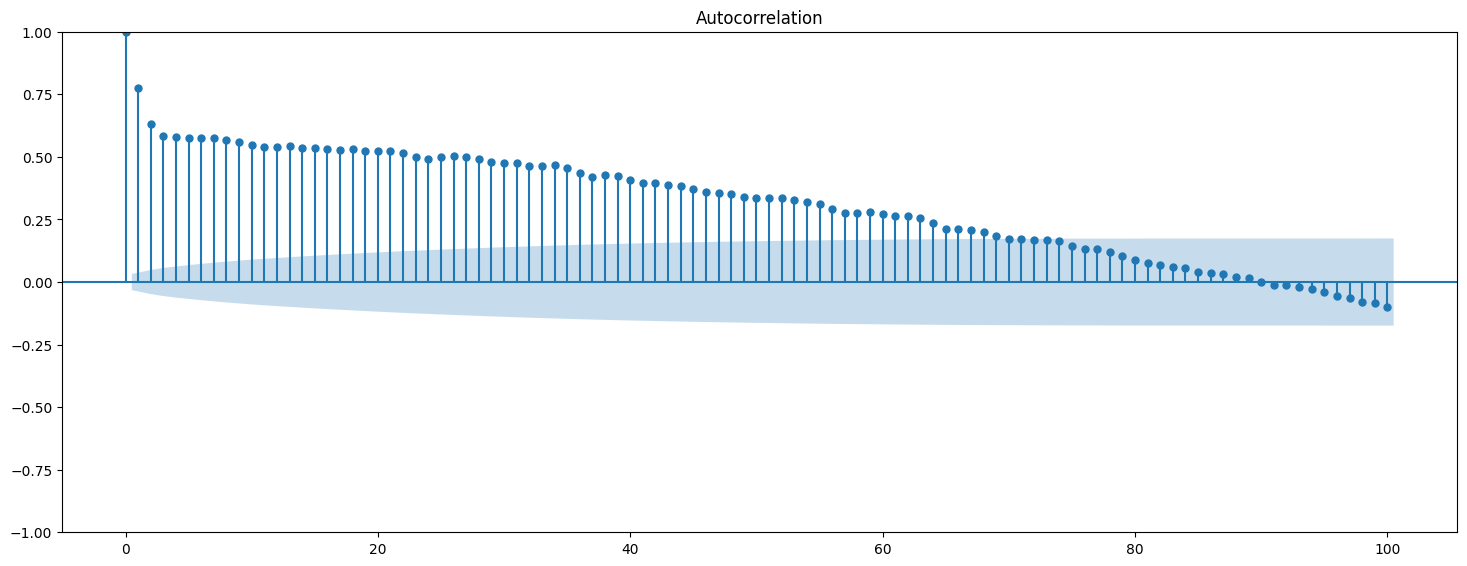

In [27]:
plt.rc('figure', figsize=(18,6.5))
plt.figure(figsize=(20,7))
plot_acf(df_acf, lags=100)
plt.show()

Autocorrelation plot does not show seasonality as none of indexes hasn't significant increase in certain period. 

The confidence level of the data is quite high.

## Augmented Dickey-Fuller (ADF) test

In [28]:
adftest = adfuller(df['Temp'],autolag='AIC')
dfoutput=pd.Series(adftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in adftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Test Statistic                   -4.444805
p-value                           0.000247
#lags used                       20.000000
number of observations used    3629.000000
critical value (1%)              -3.432153
critical value (5%)              -2.862337
critical value (10%)             -2.567194
dtype: float64


For our data the test statistic value -4.44 is less than the critical values (-3.43 , -2.86 , -2.56) at different percentage . 

In this case, we can reject our null hypothesis and conclude that our data is stationary. 

### Time Series decomposition using statsmodels

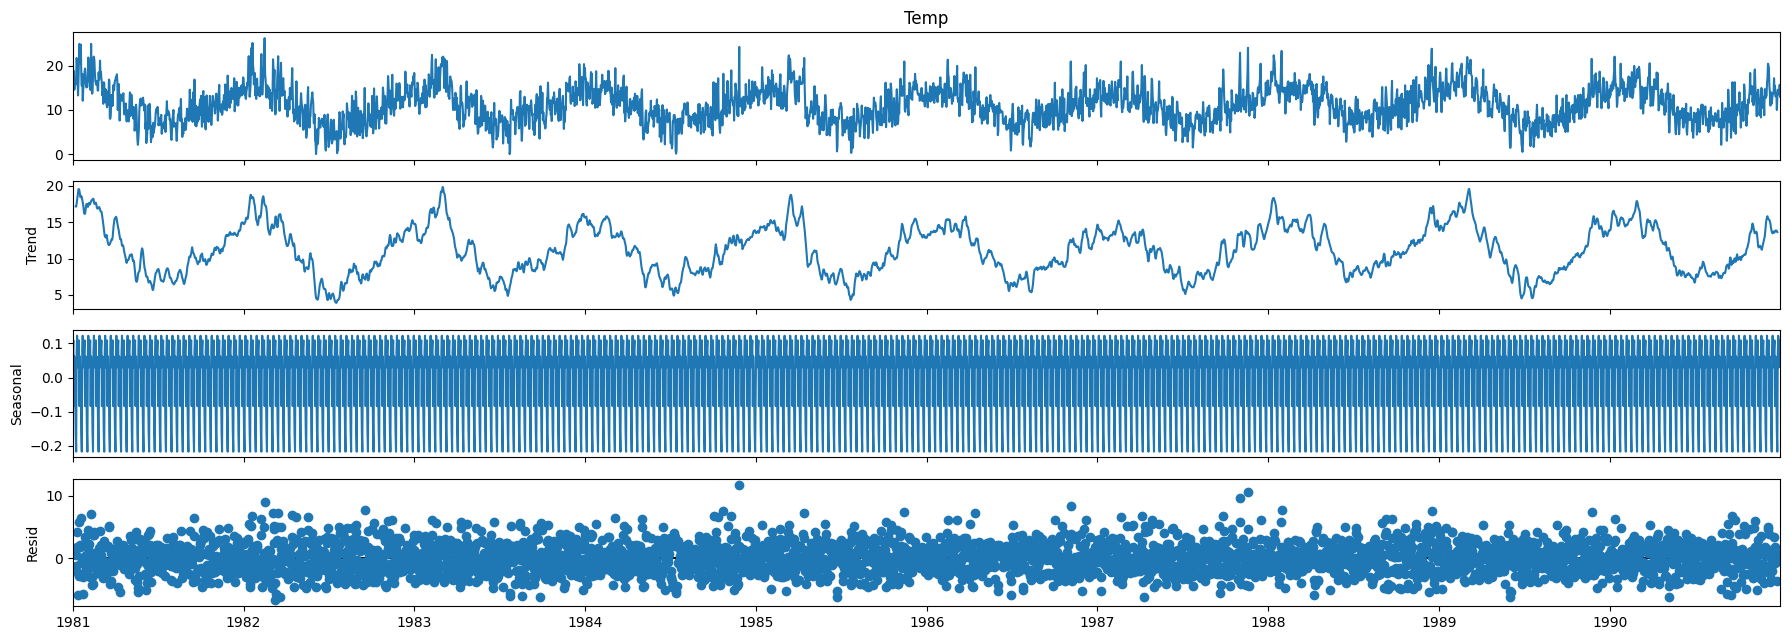

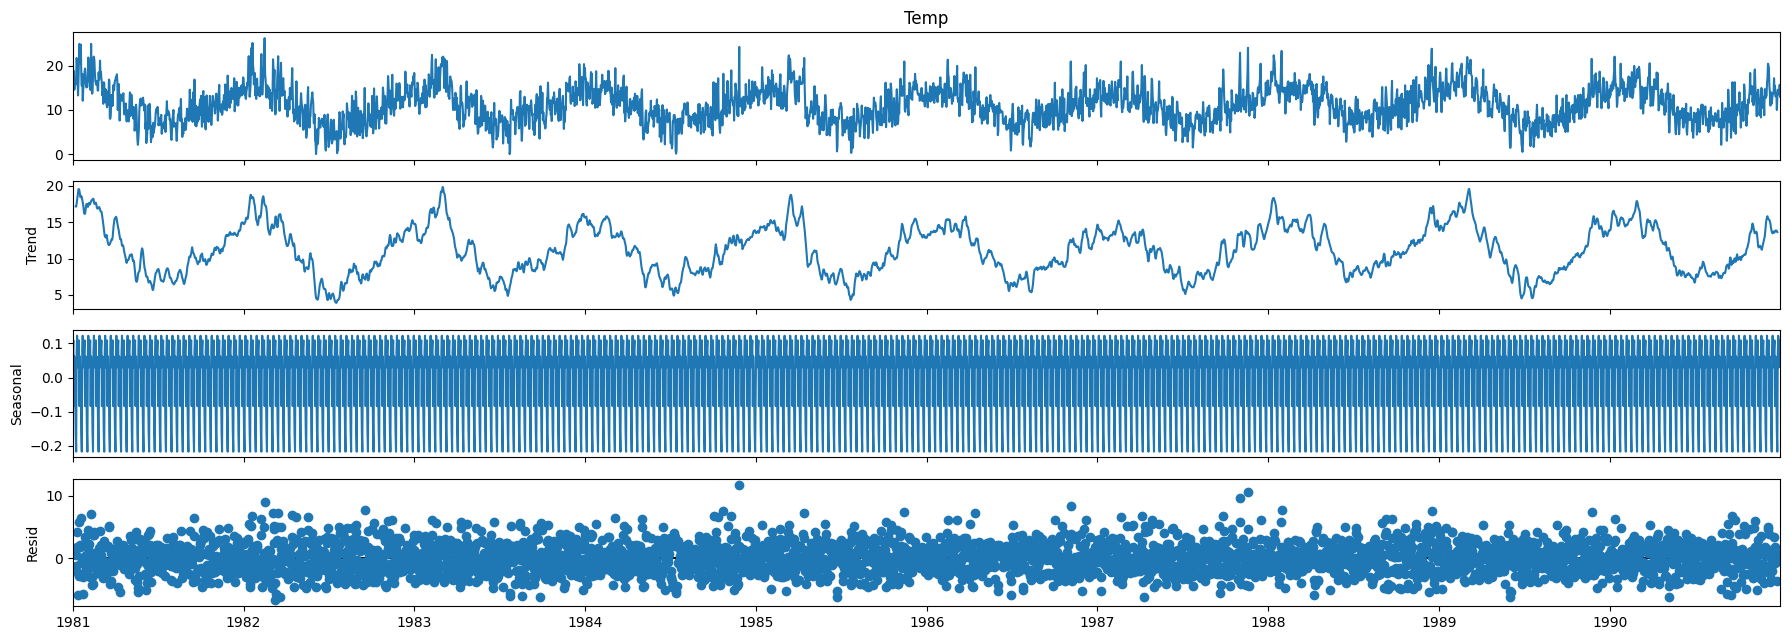

In [35]:
components = seasonal_decompose(df['Temp'], model='additive', period=12)
components.plot()

The plot above proves the lack of seasonality as well, the same result was shown with ACF plot.

There is a periodic trend in data.

Removing trend

<Axes: xlabel='Date'>

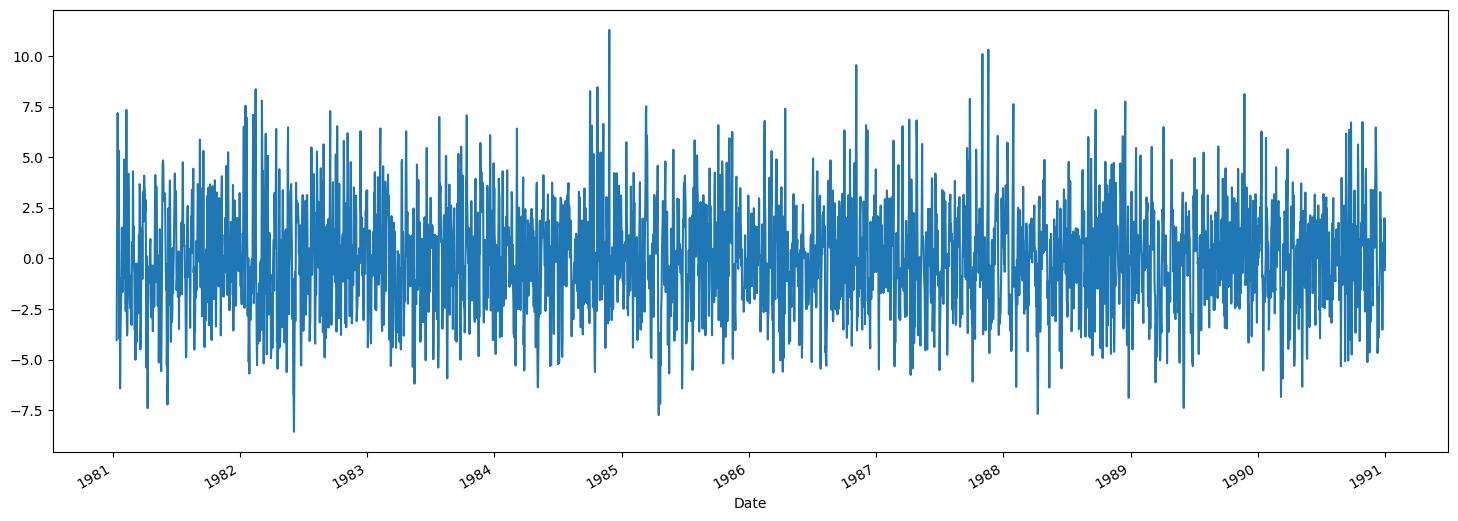

In [36]:
data = df['Temp']

rolling_mean = data.rolling(window=12).mean()
data_no_trend= data - rolling_mean
data_no_trend.plot()

Detrended data

## Auto Regressive Integrated Moving Average (ARIMA)

In [37]:
model = ARIMA(df.values, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

d:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3650
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8413.583
Date:                Sat, 22 Jul 2023   AIC                          16833.165
Time:                        12:47:09   BIC                          16851.772
Sample:                             0   HQIC                         16839.792
                               - 3650                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4630      0.017     26.538      0.000       0.429       0.497
ma.L1         -0.9204      0.008   -111.103      0.000      -0.937      -0.904
sigma2         5.8902      0.129     45.766      0.0

In [38]:
model = auto_arima(df, trace=True, suppress_warnings=True)
output_df = model.fit(df)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=16781.136, Time=4.97 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20611.139, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17265.725, Time=0.58 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=18554.160, Time=0.90 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28436.596, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=16816.370, Time=3.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=16831.033, Time=3.56 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=16780.220, Time=6.67 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=16777.600, Time=5.84 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=17113.438, Time=1.58 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=16779.598, Time=6.36 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=17245.958, Time=0.71 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=17030.851, Time=1.62 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=16781.448, Time=4.27 sec
 ARIMA(3,0,1)(0,0,0

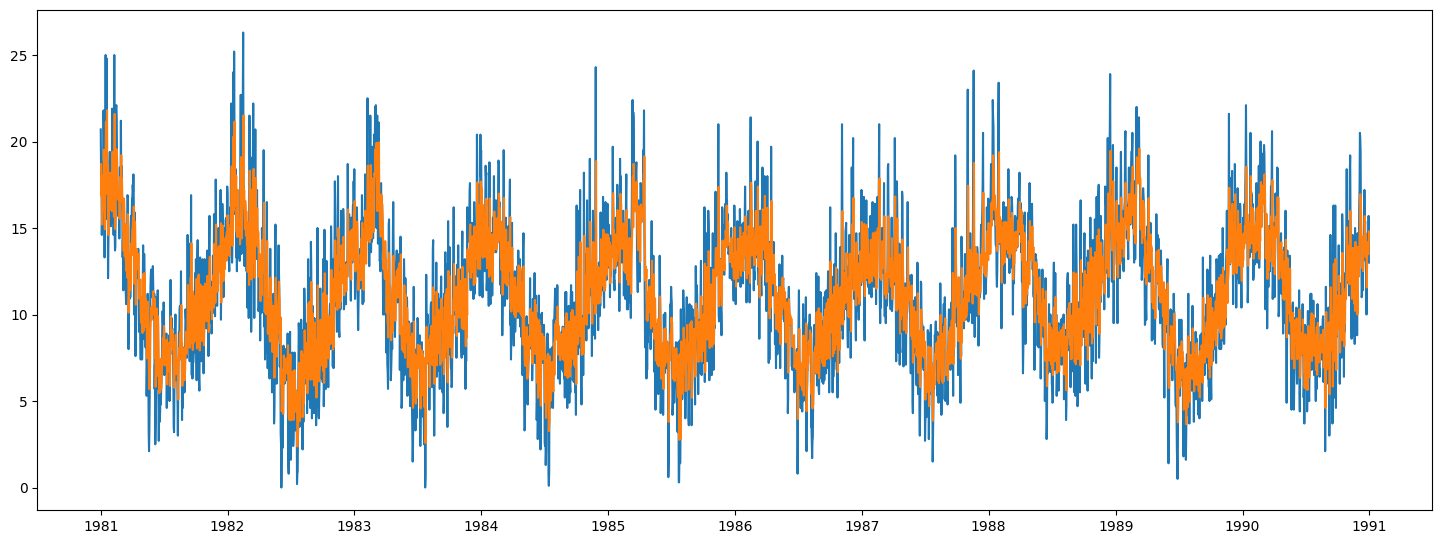

In [39]:
plt.plot(df)
fitted_vals = output_df.fittedvalues()
fitted_vals = fitted_vals[1:]
plt.plot(fitted_vals)